In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


## 1. Import fashion mnist data

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 2. Explore the data

In [4]:
train_images.shape  #60,000 images with each image having 28 X 28 pixels

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape   #10,000 images with each image having 28 x 28 pixel

(10000, 28, 28)

In [8]:
len(test_labels)

10000

## 3. Preprocess the data

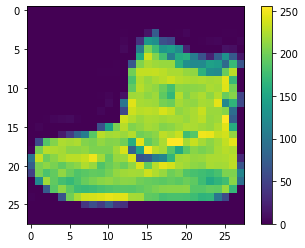

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
#Preprocess the images
train_images = train_images / 255.0

test_images = test_images / 255.0

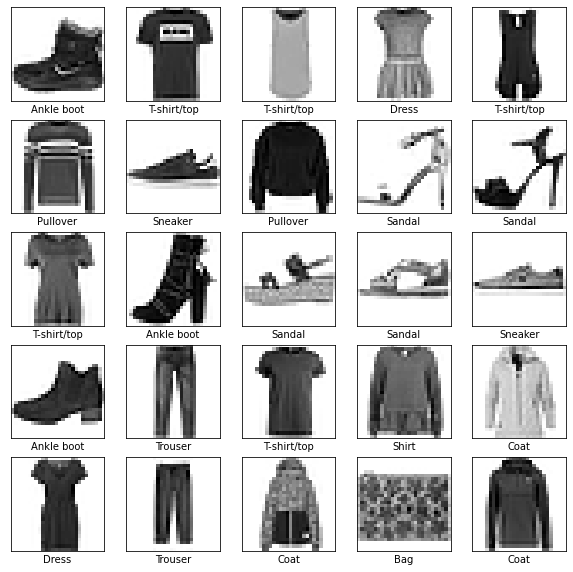

In [11]:
#Display the first 25 images from training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

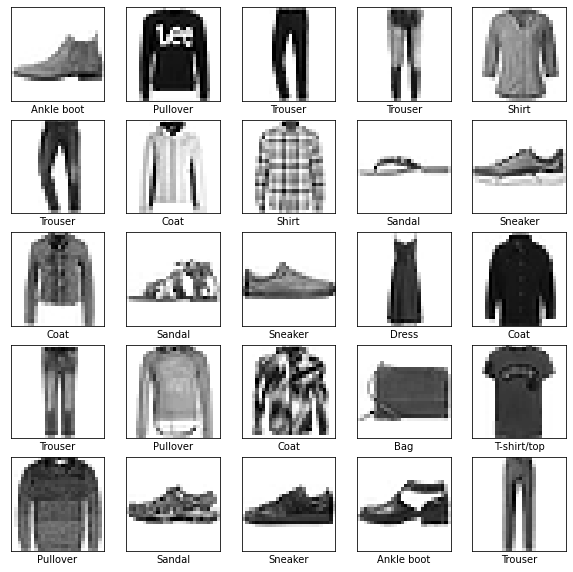

In [12]:
#Display first 25 images from testing set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show()

## 4. Build the model

#### 4.1 Set up the layers

In [13]:
#Flatten the array
train_flat_images = train_images.reshape((len(train_images), np.prod(train_images.shape[1:])))
test_flat_images = test_images.reshape((len(test_images), np.prod(test_images.shape[1:])))

In [14]:
'''
Let’s put together a basic network. We’re simply going to create an encoding layer, and a decoding layer. 
We’ll put them together into a model called the autoencoder below. We’ll also decrease the size of the 
encoding so we can get some of that data compression. Here we’ll use 36 to keep it simple.
'''
encoding_dim = 36
input_img = keras.layers.Input(shape=(784,))

#Size of the output
output_dim = 784

#encoder and decoder functions
encoded = keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = keras.layers.Dense(output_dim, activation='sigmoid')(encoded)

In [15]:
#Model that accepts input as input_img and output as decoder
autoencoder = keras.models.Model(input_img, decoded)

#### 4.2 Compile the model

In [16]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') 
#binary_crossentropy because the last layer is sigmoid activation function

## 5. Train the Model

#### 5.1 Feed the model

In [17]:
autoencoder.fit(train_flat_images, 
                train_flat_images, 
                epochs=15, 
                batch_size=256, 
                shuffle=True,
                validation_data=(test_flat_images, test_flat_images))

Epoch 1/15
235/235 [==============================] - 3s 11ms/step - loss: 0.4112 - val_loss: 0.3398
Epoch 2/15
235/235 [==============================] - 3s 11ms/step - loss: 0.3259 - val_loss: 0.3189
Epoch 3/15
235/235 [==============================] - 3s 11ms/step - loss: 0.3104 - val_loss: 0.3068
Epoch 4/15
235/235 [==============================] - 3s 11ms/step - loss: 0.3007 - val_loss: 0.2993
Epoch 5/15
235/235 [==============================] - 2s 11ms/step - loss: 0.2941 - val_loss: 0.2935
Epoch 6/15
235/235 [==============================] - 3s 11ms/step - loss: 0.2896 - val_loss: 0.2903
Epoch 7/15
235/235 [==============================] - 3s 11ms/step - loss: 0.2872 - val_loss: 0.2885
Epoch 8/15
235/235 [==============================] - 2s 11ms/step - loss: 0.2857 - val_loss: 0.2874
Epoch 9/15
235/235 [==============================] - 3s 11ms/step - loss: 0.2846 - val_loss: 0.2864
Epoch 10/15
235/235 [==============================] - 2s 11ms/step - loss: 0.2838 - val_lo

#### 5.2 Evaluate accuracy

In [18]:
# Run your predictions and store them in a decoded_images list. 
decoded_images = autoencoder.predict(test_flat_images)

## 6. Accuracy plots

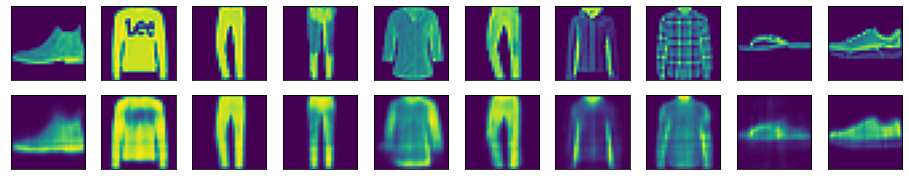

In [19]:
# We'll plot 10 images. 
n = 10
plt.figure(figsize=(16, 3))
for i in range(n):
    # Show the originals
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_flat_images[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# Show the reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i].reshape(28, 28))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()